# H&M Personalized Fashion Recommendations

First we import all the required external libraries.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

We first start by analisys all the data that we have available for this project. We start by reading all the data from the provided datasets.

In [6]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transaction_train = pd.read_csv('transactions_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')

Out of those, we have three datasets to analyse and use for the recognition system:
- Articles: clothing products information
- Customers: details about single customers
- Transactions: relate the customers with the articles bought

### Articles

To study the content of the dataset, a good approach is to display the values of the first articles in the dataset.

In [75]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


We can see there that most of the values are categorical data (no numerical), which means that we are going to need to analyse the data and find a way to match the values.

Apart from categorical data, there is another thing to be mindful of: missing data. 

We can see the number of missing("null") values for each column:

In [10]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

We only have 416 "null" values. 

Given that we have a dataset with the following number of entries:

In [24]:
articles.shape[0]

105542

Since there are only 416 empy values in the same category in the whole dataset. Missing values are only affecting 416 entries out of 105.542 which is the following porcentage of the whole dataset:

In [26]:
(416/ 105542 ) * 100

0.3941558810710428

Only the 0.4% of the articles dataset is being affected by missing data, thus we can drop the entries that contain empty values in the detail_desc category.

In [31]:
articles = articles.dropna()

We no longer have missing values in the dataset.

In [32]:
articles.isnull().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64

In [27]:
# articles[articles['detail_desc'].isna()] #drop the values?
# check data type
# articles.info()
# articles['product_group_name'].mode() 
# find out most bought 

In [81]:

def visualize_grouped_box_plots(df, cols, group, title):
    """
    Takes in a dataframe, the cols to be depicted, the one col to groupby
    the df and the title of the plot. It returns a Whiskers Box Plot.
    Parameters
    ---------
    df           : a dataframe object
             Represents the dataframe to be depicted
    cols         : a string
             Represents the columns to be depicted 
    group        : a string
             Represents the specific dataframe's column by which the subplots are grouped
    title        : a string
             Passes the title of the plot
    Returns
    -------
    plot : plot
             A Box plot
    """
    with plt.style.context('fivethirtyeight'):
        articles.boxplot(column=cols, by=group, vert = False, figsize = (13,6), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))
        plt.title(title, fontsize=16, fontweight='heavy')
        plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

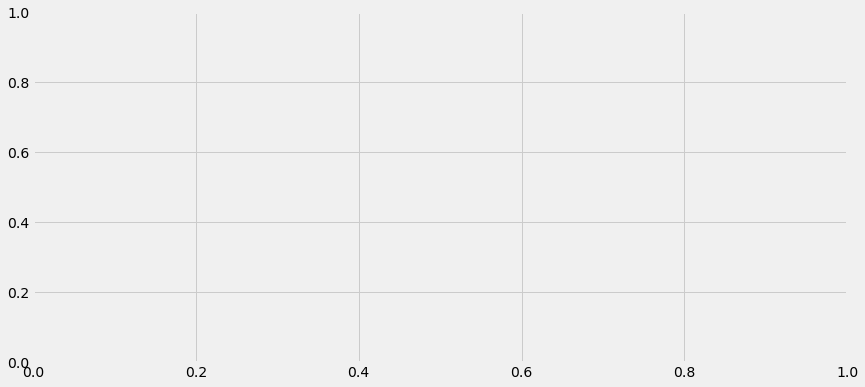

In [82]:
visualize_grouped_box_plots(articles, 'product_group_name', 'index_group_name', 'Product Name')

In [83]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [84]:
customers.shape

(1371980, 7)

In [85]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [86]:
customers['FN'].unique()

array([nan,  1.])

In [87]:
customers['Active'].unique()

array([nan,  1.])

In [88]:
customers['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [89]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [90]:
customers['age'].unique()

array([49., 25., 24., 54., 52., nan, 20., 32., 29., 31., 56., 75., 41.,
       27., 30., 48., 35., 22., 40., 38., 45., 68., 55., 19., 60., 44.,
       21., 26., 28., 53., 33., 17., 23., 51., 18., 34., 57., 47., 70.,
       50., 63., 58., 43., 67., 72., 42., 39., 79., 71., 59., 36., 62.,
       37., 46., 73., 64., 74., 61., 85., 69., 76., 66., 65., 82., 16.,
       90., 80., 78., 81., 84., 77., 97., 89., 83., 98., 88., 86., 87.,
       93., 91., 99., 96., 94., 92., 95.])

In [91]:
# Convert 'none' values to have same format
customers.loc[customers['fashion_news_frequency'] == 'NONE', 'fashion_news_frequency'] = 'none'

In [92]:
customers.loc[customers['fashion_news_frequency'] == 'None', 'fashion_news_frequency'] = 'none'

In [60]:
# Fill in nulls with "none"
#customers['fashion_news_frequency'].fillna("none", inplace = True)

In [93]:
# Verify if there are any nulls left in the Fashion News Frequency column
customers['fashion_news_frequency'].isnull().sum()

16009

In [95]:
#Fill in nulls for Age columns with the average
customers['age'].fillna('mean', inplace=True)

In [96]:
# Verify if there are any nulls left in the Age columns
customers['age'].isnull().sum()

0

In [97]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                            0
postal_code                    0
dtype: int64

In [65]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1371980 non-null  object 
 5   age                     1371980 non-null  object 
 6   postal_code             1371980 non-null  object 
dtypes: float64(2), object(5)
memory usage: 73.3+ MB


In [66]:
transaction_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [68]:
transaction_train.shape

(31788324, 5)

In [69]:
transaction_train.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64